## Problem 1.c

**Problems 1a and 1b are in pdf file.**

In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import math

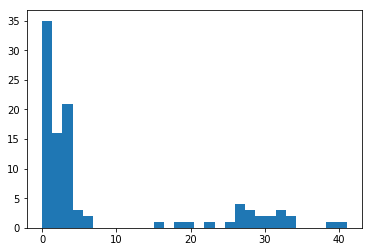

In [2]:
mtx = np.zeros((100, 2))
w_on = 0.3
lambda_on = 30
w_off = 0.7
lambda_off = 2
for i in range(100):
    p = random.random()
    mtx[i][0] = i
    if p < w_on: 
        mtx[i][1] = np.random.poisson(lambda_on) 
    else:
        mtx[i][1] = np.random.poisson(lambda_off)
       
fig = plt.hist(mtx[:,1], bins=30)

Maximimum w1:  0.23  with likehood  -261.46663030774437


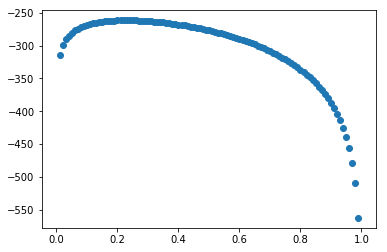

In [3]:
def poisson(m, l):
    return (l**m * math.exp(-1*l))/(math.factorial(m))
    
def log_likelihood(lamba_on, lambda_off, w_on, data): 
    tot = 0
    for i in range(len(data)):
        tot += math.log(w_on * poisson(data[i][1], lambda_on) + (1-w_on) * poisson(data[i][1], lambda_off))
    return tot

w1 = np.arange(0.01, 1.0, 0.01)
logs = np.zeros((len(w1), len(w1)))
max_weight = 0.01
max_likelihood = -100000
for w in range(len(w1)): 
    logs[w][0] = w1[w]
    log = log_likelihood(lambda_on, lambda_off, w1[w], mtx)
    logs[w][1] = log
    if log > max_likelihood: 
        max_weight = w1[w]
        max_likelihood = log

print("Maximimum w1: ", max_weight, " with likehood ", max_likelihood)
fig = plt.scatter(logs[:,0], logs[:,1])

## Problem 1.d

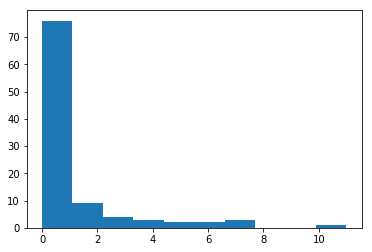

In [4]:
def get_subsamples(p):
    mtx2 = np.zeros((100, 2))
    lambda_ = poisson 
    for i in range(len(mtx)):
        mtx2[i][0] = i
        mtx2[i][1] = np.random.poisson(mtx[i][1] * p)
    return mtx2
       
p1 = 0.1
sub1 = get_subsamples(p1)
fig = plt.hist(sub1[:,1])

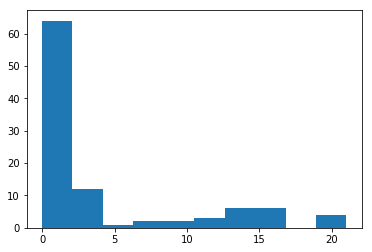

In [5]:
p2 = 0.5
sub2 = get_subsamples(p2)
fig = plt.hist(sub2[:,1])

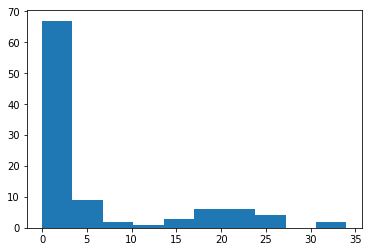

In [6]:
p3 = 0.8
sub3 = get_subsamples(p3)
fig = plt.hist(sub3[:,1])

We observed that as p goes does, the range of x values shifts towards the left e.g. gets smaller. As such, this measurement noise compresses the shape of the distribution, though it still generally resembles a Poisson distribution curve. 

## Problem 2.a and 2.b

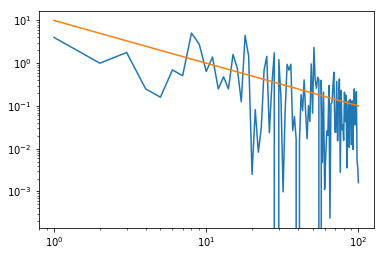

In [7]:
lambda_0 = 10
diffs = np.zeros((100, 3))
for n in range(1, 101):
    mtx = []
    # sample data
    for i in range(n): 
        mtx.append(np.random.poisson(lambda_0))
    diffs[n-1][0] = n
    # difference between lambdas
    diffs[n-1][1] = (np.mean(mtx) - lambda_0)**2
    # Theoretical bound with Fisher information
    diffs[n-1][2] = lambda_0 / n

fig = plt.loglog(diffs[:,0], diffs[:,1], diffs[:,0], diffs[:,2])
    

The slope is -1 and the intercept is at 1. This makes sense, since we start at n = 1 and the line is represented by, after simplification, lambda_0 / n. Since lambda_0 is equal to 10, and the plot above is a loglog scale, we have the intercept at 1. The slope is also reasonably -1 since we are steadily increasing n while lambda stays constant at 10. 

3c: **Derivation of relative error in pdf file**

## Problem 3.a

In [8]:
import scipy.io, scipy.sparse

In [9]:
pbmc_mtx = (scipy.io.mmread("data/matrix.mtx")).todense()
sums = np.sum(pbmc_mtx, axis = 0)
logsums = np.log(sums)
print(np.asarray(logsums)[0])

[9.02256396 8.61468281 8.36240898 ... 8.41005332 9.18409906 8.39525152]


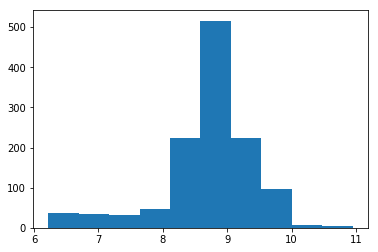

In [10]:
fig = plt.hist(np.asarray(logsums)[0])

In [11]:
print("Min: ", min(np.asarray(sums)[0]))
print("Max: ", max(np.asarray(sums)[0]))
print("Mean: ", np.mean(sums))
print("Standard Deviation: ", np.std(sums))
print("Variance: ", np.var(sums))

Min:  503
Max:  56884
Mean:  7557.400981996727
Standard Deviation:  4838.142715354704
Variance:  23407624.93413979


The min in this case is the smallest column sum, which means the lowest number of genes in a cell is 503. The max is 56884, which is the highest number of genes in a cell. The mean signifies the average gene count in a cell, though the standard deviation is quite large. As such, the variance is a very large number, probably because the gene counts are very spread out through the cells. 

## Problem 3.b

In [12]:
gene_counts = np.asarray(sums)[0]
norm_pbmc = np.multiply(pbmc_mtx / gene_counts, 10**5)

In [13]:
scatter = []
for gene in norm_pbmc: 
    if np.sum(gene) != 0:
        mean = np.mean(gene)
        stddev = np.std(gene)
        cv = (stddev/mean)
        scatter.append([mean, stddev, cv])
scatter = np.asmatrix(scatter)
print(np.asarray(scatter))

[[7.59419666e-02 1.12807409e+00 1.48544230e+01]
 [6.08062569e-03 2.12474151e-01 3.49428104e+01]
 [7.72268421e-01 3.52128860e+00 4.55966929e+00]
 ...
 [2.12591418e-01 2.60706916e+00 1.22632850e+01]
 [3.14542161e-01 2.40692724e+00 7.65216092e+00]
 [7.28352059e-02 8.44380710e-01 1.15930298e+01]]


## Problem 3.c

Coefficients of fitted line:  [-0.43314156  1.550208  ]


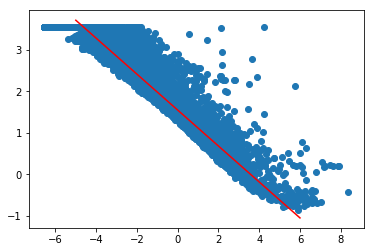

In [116]:
means = np.asarray(np.ndarray.flatten(np.log(scatter[:,0])))[0]
Cv = np.asarray(np.ndarray.flatten(np.log(scatter[:,2])))[0]
fig = plt.scatter(means, Cv)
trend = np.polyfit(means, Cv, 1)
trendpoly = np.poly1d(trend) 
print("Coefficients of fitted line: ", trend)
plt.plot(np.arange(-5, 7),trendpoly(np.arange(-5, 7)), color="red")

The slope is -0.43314156 and the y-intercept is at 1.550208. Relative to the expectations for a Poisson Model, the slope is around the expected value of -1/2. We have an intercept because these values are obtained through measurement. 

## Problem 4.a
Read in the data and take the gene counts. 

In [50]:
cyclo = (scipy.io.mmread("data/Cyclosporin A_CD3.mtx")).todense()
control = (scipy.io.mmread("data/CONTROL_CD3.1.mtx")).todense()
cyclo_sums = np.sum(cyclo, axis = 0)
control_sums = np.sum(control, axis = 0)

Column normalize and log transform the data with log(1+x), which accounts for 0 values. 

In [38]:
cyclo_gene_counts = np.asarray(cyclo_sums)[0]
control_gene_counts = np.asarray(control_sums)[0]
norm_cyclo = np.log(cyclo / cyclo_gene_counts + 1)
norm_control = np.log(control / control_gene_counts +1)

## Problem 4.b
Populate the list of Zg values from the gene histograms and plot a normalized histogram

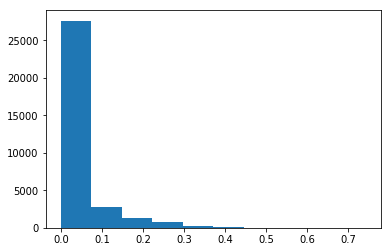

In [112]:
max_count = max(np.amax(norm_cyclo), np.amax(norm_control))
min_count = min(np.amin(norm_cyclo), np.amin(norm_control))

def Zg(control, exp):
    s = 0
    for i in range(20): 
        s1, s2 = 0, 0
        if sum(control[0]) != 0:
            s1 = control[0][i]/sum(control[0])
        if sum(exp[0]) != 0: 
            s2 = exp[0][i]/sum(exp[0])
        s += abs(s1 - s2)
    return s

norm_mtx = np.zeros((len(norm_cyclo), 1))
zg_vals = []
for i in range(len(norm_mtx)): 
    cyclo_gene = np.asarray(norm_cyclo)[i]
    control_gene = np.asarray(norm_control)[i]
    m = min(min(cyclo_gene), min(control_gene))
    ma = max(max(cyclo_gene), max(control_gene))
    
    exp_h = np.histogram(cyclo_gene, range=(m, ma), bins=20)
    control_h = np.histogram(control_gene, range=(m, ma), bins=20)
    zg_vals.append(Zg(control_h, exp_h))
    
fig = plt.hist(zg_vals)

In [115]:
top5 = np.argpartition(zg_vals, -5)[-5:]
import csv
titles = []
with open('data/gene_drug_screen.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        titles.append(row[0])
for i in top5:
    print(titles[i])
    print(sum(np.asarray(norm_cyclo)[i]) + sum(np.asarray(norm_control)[i]))

HSP90AB1
3.184528877399721
MT-CO1
24.166990444070734
PSME2
2.1014045828253964
VIM
6.526678275961044
CD52
2.333227996271472


   * HSP90AB1: This gene is a Heat Shock Protein, and it is involved in signal transduction and protein folding/degradation. Notably, it plays a role in gastric apoptosis and inflammation. The dataset contains immune cells under inflammatory conditions, so the prominence of this gene transcript makes sense. 
   * MT-CO1: This gene is a mitochondria associated protein coding gene part of the respiratory chain that catalyzes the reduction of oxygen to water. 
   * PSME2: This gene is involved in immunoproteasome assembly and required to effectively produce antigens. The presence of this transcript in this dataset makes sense, as the study focuses on cyclosporine, which often tries to suppress immune response to organ transplants in order to prevent rejection. Antigens are part of triggering the immune response. 
   * VIM: This gene encodes a filament protein and is responsible for maintaining the cell shape and integrity of the cytoplasm. It also functions to organize other critical proteins involved in cell attachment, migration and signaling. 
   * CD52: This is a protein coding gene associated with Lymphocytic Leukemia. We can assume that it has something to do with immune response, since Leukemia affects the white blood cells and the immune system. 

## Problem 4.d
Some additional data that may be helpful to assess the likelihood is the data we collected in Problem 3, such as the mean and the coefficient of variation. Additionally, we could have taken subsamples of the data and then calculated the L1 norm, from which we could construct an empirical distribution. There are ways to address the concern that two distributions are separated with statistical certainty. 